<a href="https://colab.research.google.com/github/girinath18/aadhaar-cardDetection/blob/master/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d girinathrs211555/aadhaar-datasets

Dataset URL: https://www.kaggle.com/datasets/girinathrs211555/aadhaar-datasets
License(s): unknown
aadhaar-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/aadhaar-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 AADHAAR_CARD_DETECTION  'BAT (1).jpeg'		  kaggle.json	'OIP (4).jpg'
 aadhaar-datasets.zip	  Capture1.PNG		 'OIP (1).jpg'	 OIP.jpg
'BAT (1039).jpg'	  Capture.PNG		 'OIP (2).jpg'	'pan card May 17, 2022.pdf'
'BAT (1516).jpg'	  face-mask-dataset.zip  'OIP (3).jpg'	 sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Aadhaar_card')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['BATS (272).png', 'BATS (62).jpeg', 'BATS (360).png', 'BATS (401).jpg', 'BATS (200).png']
['BATS (207).png', 'BATS (689).png', 'BATS (670).png', 'BATS (240).jpg', 'BATS (517).png']


In [8]:
without_mask_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['JOKES (312).jpeg', 'JOKES (210).jpeg', 'JOKES (371).jpeg', 'JOKES (794).jpeg', 'JOKES (59).jpeg']
['JOKES (586).jpeg', 'JOKES (88).jpeg', 'JOKES (398).jpeg', 'JOKES (652).jpeg', 'JOKES (439).jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 1500
Number of without mask images: 1500


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*1500

without_mask_labels = [0]*1500

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

1500
1500


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

3000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

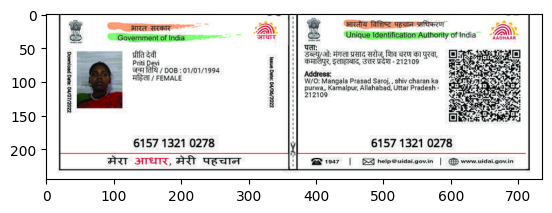

In [14]:
# displaying with mask image
img = mpimg.imread('/content/AADHAAR_CARD_DETECTION/Aadhaar_card/BATS (670).png')
imgplot = plt.imshow(img)
plt.show()

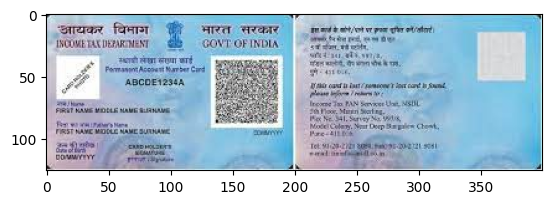

In [15]:
# displaying without mask image
img = mpimg.imread('/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card/JOKES (88).jpeg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/AADHAAR_CARD_DETECTION/Aadhaar_card/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [17]:
type(data)

list

In [18]:
len(data)

3000

array([[[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [241, 241, 242],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [242, 242, 242],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [242, 242, 242],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [243, 243, 243],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 253, 253],
        ...,
        [253, 252, 252],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
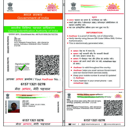

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(3000, 128, 128, 3)
(3000,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 128, 128, 3) (2400, 128, 128, 3) (600, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[204, 204, 214],
        [213, 220, 228],
        [230, 243, 254],
        ...,
        [214, 252, 255],
        [218, 238, 243],
        [253, 244, 235]],

       [[ 44,  46,  55],
        [176, 186, 195],
        [196, 212, 224],
        ...,
        [154, 203, 218],
        [107, 138, 148],
        [119, 119, 112]],

       [[109, 116, 124],
        [204, 219, 228],
        [183, 203, 213],
        ...,
        [123, 193, 212],
        [115, 168, 181],
        [ 73,  92,  88]],

       ...,

       [[ 95,  82,  85],
        [189, 173, 178],
        [193, 174, 183],
        ...,
        [110, 174, 205],
        [102, 158, 185],
        [ 80, 107, 119]],

       [[ 41,  31,  33],
        [155, 142, 146],
        [197, 180, 189],
        ...,
        [119, 177, 204],
        [ 68, 106, 131],
        [ 53,  57,  67]],

       [[206, 197, 199],
        [204, 192, 197],
        [240, 224, 233],
        ...,
        [181, 234, 254],
        [156, 196, 221],
        [205, 215, 225]]], dtype=uint8)
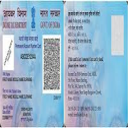

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.8       , 0.8       , 0.83921569],
        [0.83529412, 0.8627451 , 0.89411765],
        [0.90196078, 0.95294118, 0.99607843],
        ...,
        [0.83921569, 0.98823529, 1.        ],
        [0.85490196, 0.93333333, 0.95294118],
        [0.99215686, 0.95686275, 0.92156863]],

       [[0.17254902, 0.18039216, 0.21568627],
        [0.69019608, 0.72941176, 0.76470588],
        [0.76862745, 0.83137255, 0.87843137],
        ...,
        [0.60392157, 0.79607843, 0.85490196],
        [0.41960784, 0.54117647, 0.58039216],
        [0.46666667, 0.46666667, 0.43921569]],

       [[0.42745098, 0.45490196, 0.48627451],
        [0.8       , 0.85882353, 0.89411765],
        [0.71764706, 0.79607843, 0.83529412],
        ...,
        [0.48235294, 0.75686275, 0.83137255],
        [0.45098039, 0.65882353, 0.70980392],
        [0.28627451, 0.36078431, 0.34509804]],

       ...,

       [[0.37254902, 0.32156863, 0.33333333],
        [0.74117647, 0.67843137, 0.69803922],
        [0.75686275, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
68/68 [==============================] - 6s 27ms/step - loss: 0.2716 - acc: 0.8986 - val_loss: 1.9496e-06 - val_acc: 1.0000
Epoch 2/5
68/68 [==============================] - 1s 17ms/step - loss: 0.0050 - acc: 0.9981 - val_loss: 9.6410e-07 - val_acc: 1.0000
Epoch 3/5
68/68 [==============================] - 1s 20ms/step - loss: 0.0026 - acc: 0.9986 - val_loss: 9.9341e-10 - val_acc: 1.0000
Epoch 4/5
68/68 [==============================] - 1s 22ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 5.5196e-06 - val_acc: 1.0000
Epoch 5/5
68/68 [==============================] - 1s 19ms/step - loss: 0.0582 - acc: 0.9861 - val_loss: 3.7170e-05 - val_acc: 1.0000


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

19/19 [==============================] - 0s 14ms/step - loss: 5.1389e-05 - acc: 1.0000
Test Accuracy = 1.0


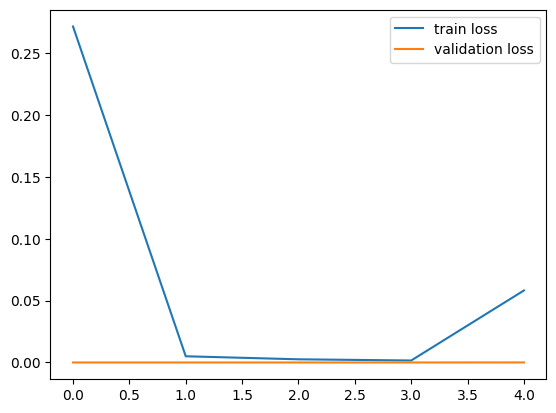

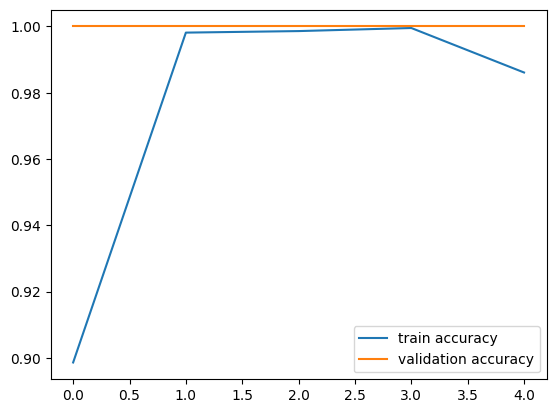

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Aadhar card')

else:

  print('Not Aadhaar Card')

Path of the image to be predicted: /content/A (900).jpg


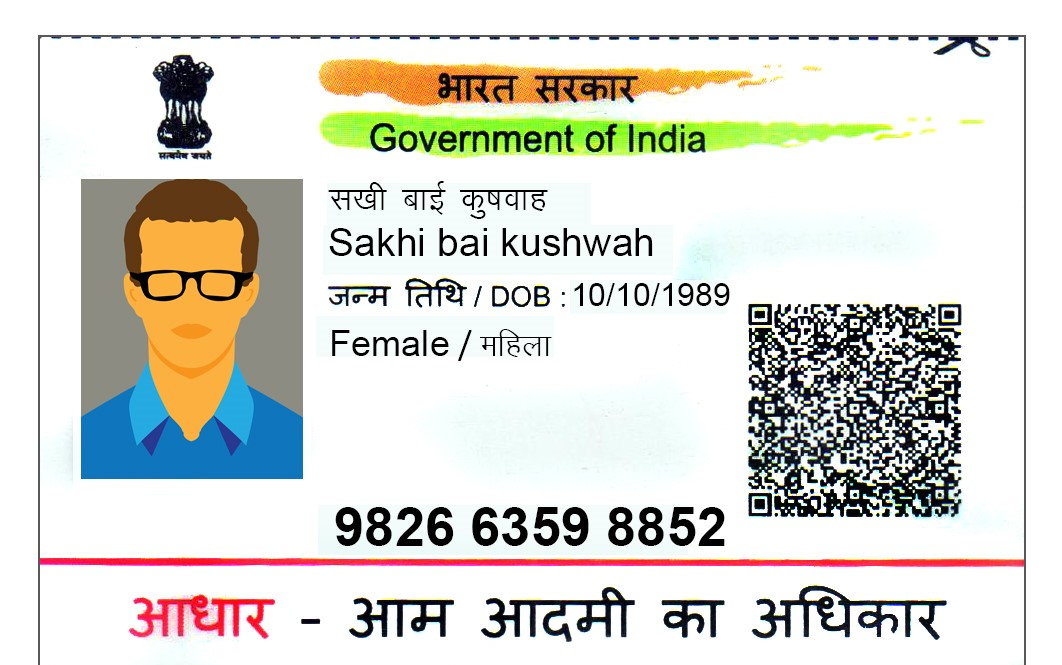

1/1 [==============================] - 0s 25ms/step
[[7.9816782e-01 3.2527685e-05]]
0
The person in the image is not wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [42]:
model.save('Aircraft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
